In [1]:
import webMining as wm
from tabulate import tabulate
from matplotlib import pyplot as plt
import requests

Retrieve HTML document

In [2]:
query = 'smartphone'
url = 'https://www.google.com/search?nord=1&tbm=shop&sxsrf=ALeKk021SiG0jK8P5QFwMwEqTTzTaLSJzw%3A1592931029540&source=hp&ei=1TLyXsOJHpqj5OUPhpau4A0&q='+query+'&oq='+query+'&gs_lcp=Cgtwcm9kdWN0cy1jYxADMgQIIxAnMgIIADICCAAyAggAMgIIADICCAAyAggAMgIIADICCAAyAggAOgcIIxDqAhAnUNcxWKk3YLY9aAFwAHgAgAFyiAHhBpIBAzAuOJgBAKABAaoBD3Byb2R1Y3RzLWNjLXdperABCg&sclient=products-cc&ved=0ahUKEwiDyKjBspjqAhWaEbkGHQaLC9wQ4dUDCAc&uact=5' 
headers = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:77.0) Gecko/20100101 Firefox/77.0',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
    'Accept-Language': 'en-US,en;q=0.5',
    'Referer': 'https://www.google.com/',
    'Connection': 'keep-alive',
    'Cookie': 'CGIC=Ikp0ZXh0L2h0bWwsYXBwbGljYXRpb24veGh0bWwreG1sLGFwcGxpY2F0aW9uL3htbDtxPTAuOSxpbWFnZS93ZWJwLCovKjtxPTAuOA; NID=204=g5k0DQlZKLTdLr2eD81V0cBic7FoycSof8bAgCMupaGwWO-cn-aDp4NUCNcHkvob_dhAbeN494eviqwrSCfwhQDQq_d-K4HTG-YNx2lF8KG8VIk6Yo2a7c3Pw5HotilTZgFSU8VD0uKVW8AV690h73WIiDIcfNVwDYelsvHet_n3khOjpi6XfQl0CObNAEM_f8Hm7OwWc6un1hNiaTSC2W__Y9roxCVOUOpPGvAiQgoBNL2k5G_H51ZyUiTKZRsH4QUu-MOLeMLsUtr5jwUVhZbGX4xfCzos-5uBgg; SID=xQcO_AUE9k37wpaevy5EK5x-zYouKXZoIrNPNOUA6FRikzN8XkHxgCwnV5Fzza3RX_3U_Q.; HSID=AmrflQdOkBZnypTpP; SSID=AnGRjrMyz8shzmiN-; APISID=gikUssmL2DgWeE-G/AGmE_sScY4sR1j7Gi; SAPISID=rEtgdwZ7oEheKA_J/AnzdQ-CXLl9P_DRxl; ANID=AHWqTUmOvuytiAZ-RiEMDbSXk1liOmiVXsC3K6j8wTAEsxXncb8Naetqd35RHH5u; SIDCC=AJi4QfH7YFZXPoNzhwKuKu3wXev3h6HvD9qbfqDB0-6PoOq2RkwFgUHu3oxgm8LCqqtm7aWDH_-J; SEARCH_SAMESITE=CgQI_48B; __Secure-3PSID=xQcO_AUE9k37wpaevy5EK5x-zYouKXZoIrNPNOUA6FRikzN8DoN4DUANadKjm3gWjbWkKQ.; __Secure-3PAPISID=rEtgdwZ7oEheKA_J/AnzdQ-CXLl9P_DRxl; __Secure-HSID=AmrflQdOkBZnypTpP; __Secure-SSID=AnGRjrMyz8shzmiN-; __Secure-APISID=gikUssmL2DgWeE-G/AGmE_sScY4sR1j7Gi; 1P_JAR=2020-06-23-16; OTZ=5502067_68_64_73560_68_416340; DV=k7tykpHOCQdJUOnslcXBzjs-r2ohLheAAP7r7W9LEAYAANDMM2lHtAn8AAIAAJSWJz2C-gppkwAAAA',
    'Upgrade-Insecure-Requests': '1',
    'TE': 'Trailers'}
#payload = ''
#response = requests.post(url, data=payload, headers=headers)
response = requests.get(url, headers=headers)

Instantiate DOM tree and extractor

In [3]:
#doc = wm.DOM('test.html', '')
doc = wm.DOM(url, response.text)
dsre = wm.DSRE()

Extract

In [4]:
dsre.extract(doc)

Retrieve the number of extracted regions

In [5]:
rcount = dsre.regionCount()

Iterate over the extracted regions, building a table (a matrix with dimensions recordCount x recordSize) with the extraction results of each region

In [6]:
content = []
regions = []
tps = []
for reg in range(0, rcount):
    dr = dsre.getDataRegion(reg)
    content.append(dr.isContent())
    tps.append(dr.getSequence())
    rows = dr.recordCount()
    cols = dr.recordSize()
    records = []
    for r in range(0, rows):
        record = []
        for c in range(0, cols):
            cell = dr.getCell(r,c)
            if (cell != None):
                record.append(cell.toString())
        records.append(record)
    regions.append(records)

Displays a table with the results of each region

In [7]:
content_string = ['noise', 'content']
for i, region in enumerate(regions):
    display('Region #' + str(i) + ' - ' + content_string[content[i]])
    display(tabulate(region, tablefmt='html'))

'Region #0 - content'

"Samsung Galaxy A10 32GB Dual Chip Android 9.0 Tela 6.2"" Octa-Core 4G C","R$ 789,00.","R$ 789,00",Magazine Luiza,em Celulares e smartphones,Samsung,Galaxy,Galaxy A,Aproveite a tela grande para assitir aos seus conteúdos no celular. Mergulhe nos seus conteúdos e jogos favoritos com o seu ...,·,·,·,"<img class=TL92Hc c13 data-deferred=1 id=srpresultimg_17388892140005046391_1 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",Comparar preços de 10+ lojas,7.424 comentários sobre o produto,nº1,Outras opções de estilo:,21 horas de conversação,4G LTE,13 megapixels,Reconhecimento facial,"Tela de 6,2 polegadas",Android,Galaxy A10,,,·,·,·,·,·,·,Vermelho,Azul,(R$ 1.179),(R$ 900),,,
"Smartphone Samsung Galaxy A30s 64Gb Branco 4G Tela 6.4"" Câmera Tripla 25Mp Selfie 16Mp Dual Chip Android 9.0","R$ 1.289,00.","R$ 1.289,00",Carrefour,em Celulares e smartphones,Samsung,Galaxy,Galaxy A,"Mergulhe no grande display infinito de 6,4 polegadas do Galaxy A30s. Uma proporção ampla preenche sua tela com conteúdos de ...",·,·,·,"<img class=TL92Hc c13 data-deferred=1 id=srpresultimg_7826504645178783259_1 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",Comparar preços de 20+ lojas,930 comentários sobre o produto,nº2,Outras opções de estilo:,32 horas de conversação,4G LTE,25 megapixels,Impressão digital,Reconhecimento facial,"Tela de 6,4 polegadas",Android,,,·,·,·,·,·,·,Violeta,Preto,(R$ 1.010),(R$ 1.349),,,
"Smartphone Motorola Moto E6 Play, 32GB, Dual Chip, 8MP, 4G, Preto - XT2029","R$ 829,00.","R$ 829,00",Colombo.com.br,em Celulares e smartphones,Motorola,Motorola moto,moto e,O,"Motorola Moto E6 Play com 32 GB Dual Chip chega com uma série de funções, em um modelo versátil e moderno. O item ...",·,·,Pessoas também avaliaram,"<img class=TL92Hc c13 data-deferred=1 id=srpresultimg_8898143653398756764_1 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",Comparar preços de 25+ lojas,(5.826),121 comentários sobre o produto,nº3,Outras opções de estilo:,4G LTE,13 megapixels,Impressão digital,Reconhecimento facial,"Tela de 5,5 polegadas",Android,moto e6,,·,·,·,·,·,·,·,Azul Metálico,(R$ 854),91%,positivos,Smartphone
Smartphone LG K8+ 16GB Dual Chip Câmera Principal 8MP Frontal 5MP Andr,"R$ 585,00.","R$ 585,00",Magazine Luiza,"Tela de 5,45 polegadas",8 megapixels,157 gramas,2 chips,LG K8+ 16GB Dual Chip Câmera Principal 8MP Frontal 5MP Andr,·,·,·,"<img class=TL92Hc c13 data-deferred=1 id=srpresultimg_18320602908266571731_1 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",Smartphone,,,,,,,,,,,,,,,,,,,,,,,,,
Smartphone Asus Max M2 32gb,"R$ 580,00.","R$ 580,00",Mercado Livre,Android,"Tela de 5,5 polegadas",Reconhecimento facial,4G LTE,O Zenfone Max M2 é um,"completo com várias funcionalidades que vão atender a suas expectativas, projetado pela Asus ...",·,·,"<img class=TL92Hc c13 data-deferred=1 id=srpresultimg_4687655848645502506_1 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",2 chips,32 GB,·,·,·,Smartphone,,,,,,,,,,,,,,,,,,,,
Smartphone Samsung Galaxy A20s Dual Sim 32gb Oferta,"R$ 725,00.","R$ 725,00",Mercado Livre,Samsung,Galaxy,Galaxy A,Android,"Desbloqueado. Tela TFT de 6.5"". Câmeras traseiras de 13Mpx/8Mpx/5Mpx. Câmera frontal de 8Mpx. Processador Snapdragon 450 Octa ...",·,·,·,"<img class=TL92Hc c13 data-deferred=1 id=srpresultimg_8403152462745231801_1 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",183 gramas,4G LTE,13 megapixels,Impressão digital,Reconhecimento facial,"Tela de 6,5 polegadas",·,·,·,·,·,·,,,,,,,,,,,,,,
Smartphone LG K8+ 16GB Dual Chip Câmera Principal 8MP Frontal 5MP Andr,"R$ 585,00.","R$ 585,00",Magazine Luiza,LG,LG K,Android,"Tela de 5,45 polegadas",O dia-a-dia é cada vez mais corrido e cheio de imprevistos. Mas fique tranquilo porque o LG K8+ possui resistência militar ...,·,·,·,"<img clas

'Region #1 - noise'

"<img alt=Samsung data-deferred=1 id=vrefimg_0_0_20 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",Samsung,
"<img alt=Motorola data-deferred=1 id=vrefimg_0_1_20 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",Motorola,
"<img alt=LG data-deferred=1 id=vrefimg_0_2_20 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",LG,
"<img alt=Xiaomi data-deferred=1 id=vrefimg_0_3_20 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",Xiaomi,
"<img alt=Multilaser data-deferred=1 id=vrefimg_0_4_20 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",Multilaser,
"<img alt=Positivo data-deferred=1 id=vrefimg_0_5_20 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",Positivo,
"<img alt=Apple data-deferred=1 id=vrefimg_0_6_20 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",Apple,Filtrar por recurso
"<img alt=4G LTE data-deferred=1 id=vrefimg_1_0_21 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",4G LTE,
"<img alt=Resistente à água data-deferred=1 id=vrefimg_1_1_21 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",Resistente à água,
"<img alt=Carregamento sem fio data-deferred=1 id=vrefimg_1_2_21 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",Carregamento sem fio,
"<img alt=Smartphone data-deferred=1 id=vrefimg_1_3_21 src=data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw== />",Smartphone,


Plot the sequence of the document and the subsequence of each region

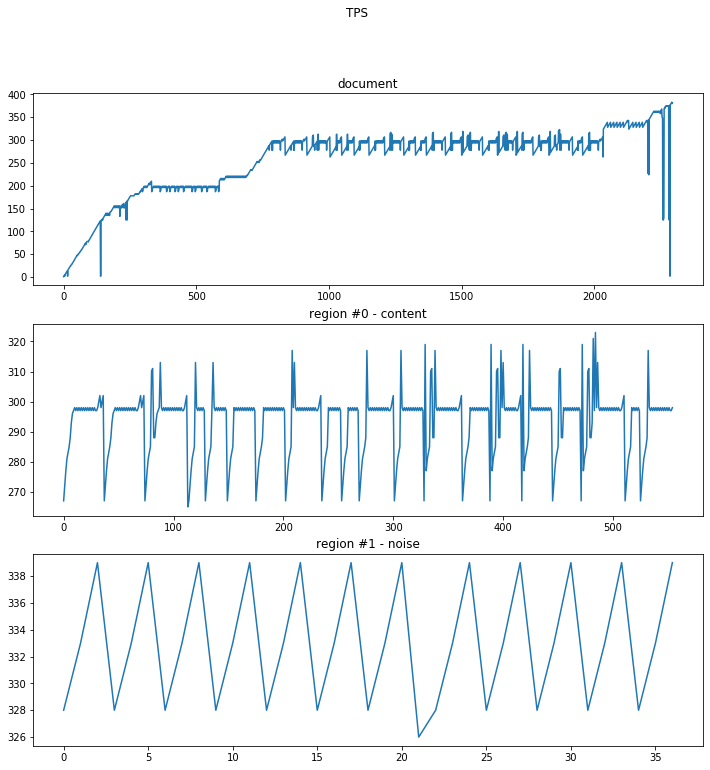

In [8]:
fig, axs = plt.subplots(len(regions) + 1, figsize=(12,12))
fig.suptitle('TPS')
axs[0].plot(dsre.getSequence())
axs[0].set_title('document')
for i in range(0, len(regions)):
    axs[i+1].set_title('region #' + str(i) + ' - ' + content_string[content[i]])
    axs[i+1].plot(tps[i])